### Task Sbmission in order to fullfill the requirements of The Spark Foundation Intern task
- **By- Nayanika Singh**

**Hi!!
I am Nayanika Singh And below is my Data analyst Intern task**

**Importing Exploratory libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('SampleSuperstore.csv')

**Lets Start with a little EDA**

In [3]:
df.head()


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
df.shape

(9994, 13)

In [6]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [7]:
df.drop('Country',axis=1, inplace=True)

- Up on research I found out that there is only one country i,e US so I dropped it because it's not significant in this case

In [8]:
df.isnull().sum()

Ship Mode       0
Segment         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
df.dtypes

Ship Mode        object
Segment          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

**Finding nulls**

<AxesSubplot:>

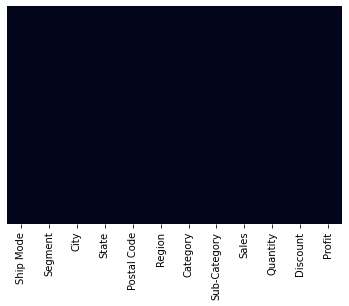

In [10]:
sns.heatmap(df.isna(),cbar = False,yticklabels = False)

**This clears that we don't have nulls**

In [11]:
df.nunique()

Ship Mode          4
Segment            3
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

**Lets check outliers**

<AxesSubplot:>

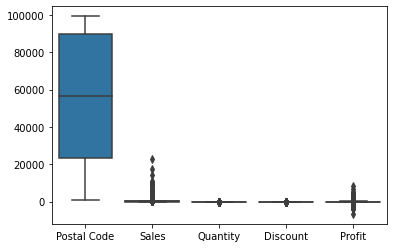

In [12]:
sns.boxplot(data=df)

<AxesSubplot:xlabel='Sales'>

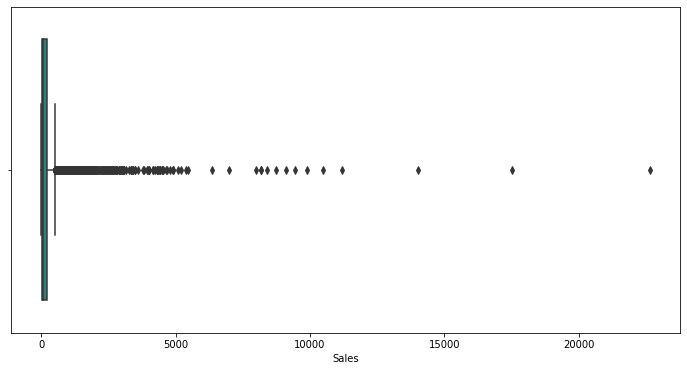

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Sales',data=df, palette='viridis')

<AxesSubplot:xlabel='Quantity'>

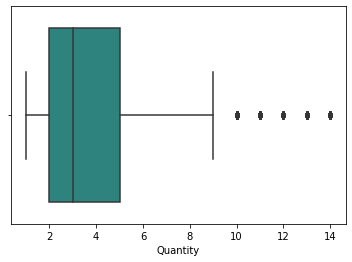

In [14]:
sns.boxplot(x='Quantity',data=df, palette='viridis')

<AxesSubplot:xlabel='Discount'>

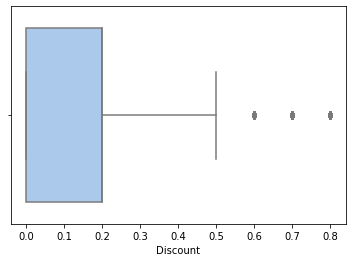

In [15]:
sns.boxplot(x='Discount',data=df, palette='pastel')

<AxesSubplot:xlabel='Profit'>

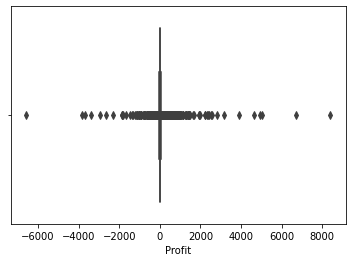

In [16]:
sns.boxplot(x='Profit',data=df)

- I won't drop any outliers because I don't want to drop out any correct but exceptional value which has the potential to have this value if this data is later on modeled.

**Relationship Correlation** 

<AxesSubplot:>

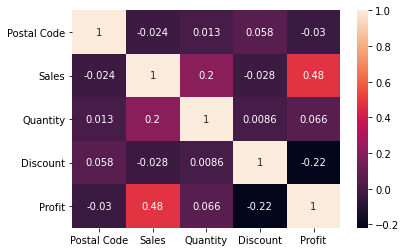

In [17]:
sns.heatmap(df.corr(), annot = True)

- There is no significant co-relation between dependent variable so we can't use this coreelation isany case.

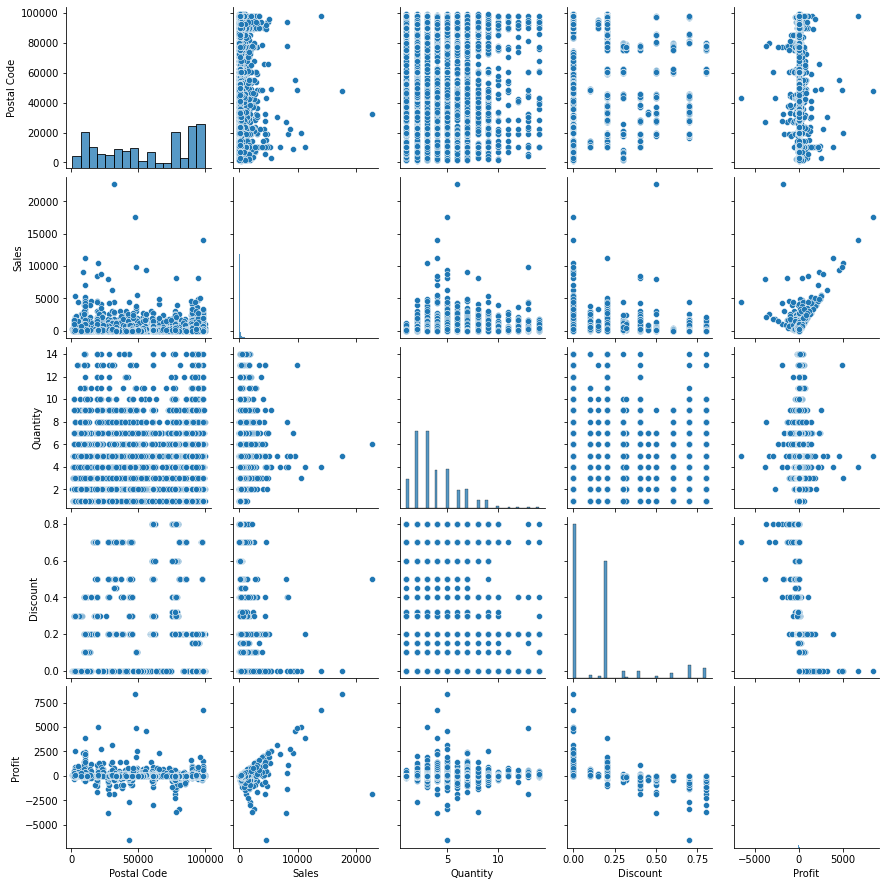

In [18]:
sns.pairplot(df)

**Plot Inference**
There seems to be a good relationship between Sales and profit.

<AxesSubplot:xlabel='State'>

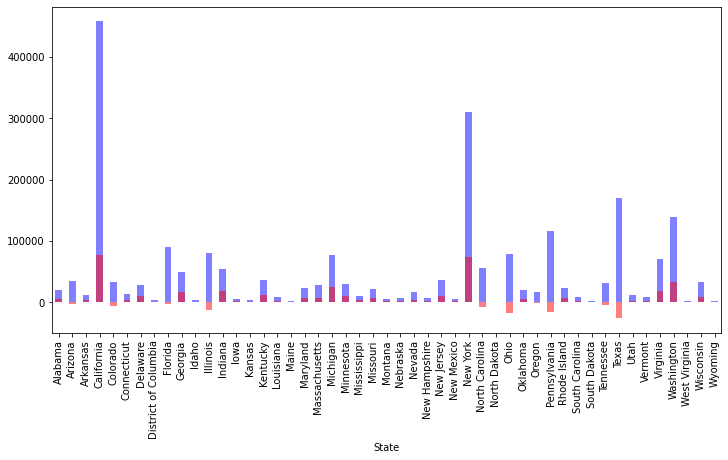

In [19]:
plt.figure(figsize=(12,6))
df.groupby(by='State')['Sales'].sum().plot.bar(alpha=0.5,color='blue',label='Sales')
df.groupby(by='State')['Profit'].sum().plot.bar(alpha=0.5,color='red',label='Profit')

**Plot Inference**
- Here we are representing State wise Profit VS Sales graph.

<AxesSubplot:xlabel='Category'>

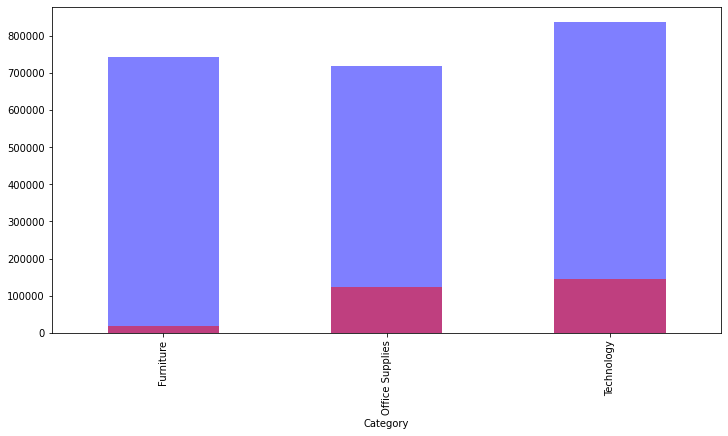

In [20]:
plt.figure(figsize=(12,6))
df.groupby(by='Category')['Sales'].sum().plot.bar(alpha=0.5,color='blue',label='Sales')
df.groupby(by='Category')['Profit'].sum().plot.bar(alpha=0.5,color='red',label='Profit')

**Plot Inference**
- Here we are representing Category wise Profit VS Sales graph.

<AxesSubplot:xlabel='Category'>

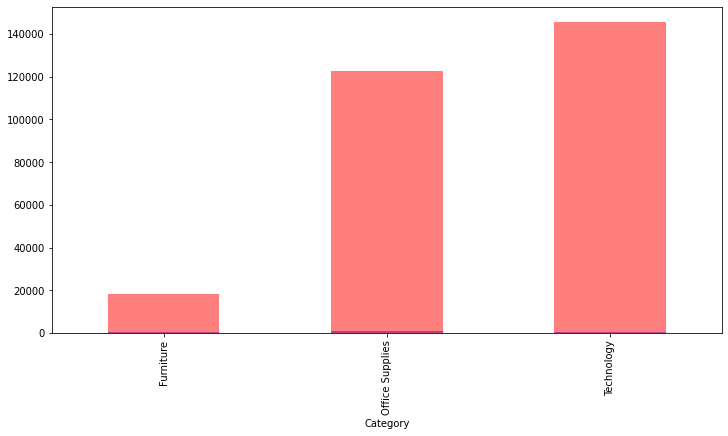

In [21]:
plt.figure(figsize=(12,6))
df.groupby(by='Category')['Discount'].sum().plot.bar(alpha=0.5,color='blue',label='Sales')
df.groupby(by='Category')['Profit'].sum().plot.bar(alpha=0.5,color='red',label='Profit')

**Plot Inference**
- Here we are representing Category wise Profit VS Discount graph.
- Due to the large number of Sales comparision is hindered so we are not comparing these directly.

<AxesSubplot:xlabel='Category'>

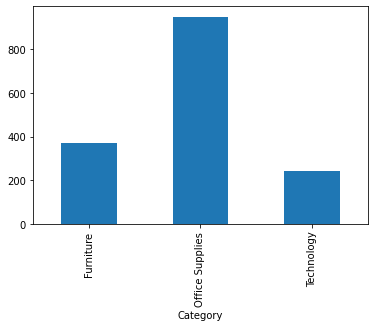

In [22]:
df.groupby(by='Category')['Discount'].sum().plot.bar()

**Plot Inference**
- Here we can clearly see that Discount on office suplly is greater than anyother. So we need to change our strategy as discount is not the deciding factor here in order to gain profit.


<AxesSubplot:xlabel='Sub-Category'>

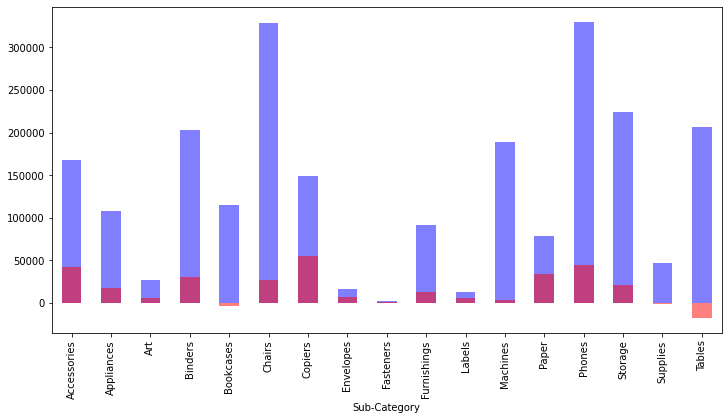

In [23]:
plt.figure(figsize=(12,6))
df.groupby(by='Sub-Category')['Sales'].sum().plot.bar(alpha=0.5,color='blue',label='Sales')
df.groupby(by='Sub-Category')['Profit'].sum().plot.bar(alpha=0.5,color='red',label='Profit')

**Plot Inference**
- Here we are representing Sub-Category wise Profit VS Sales graph. 
- We are getting higer profit in Copiers inspite of Phones and Chairs having high sales. So we can shift our focus more towards copiers sales than others because it is more profit making.

<AxesSubplot:xlabel='Sub-Category'>

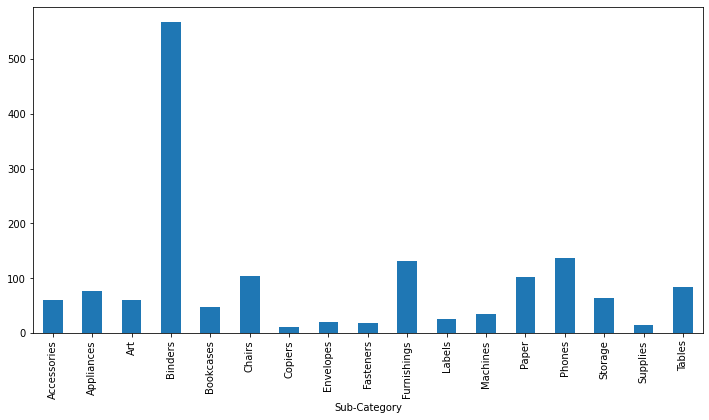

In [24]:
plt.figure(figsize=(12,6))
df.groupby(by='Sub-Category')['Discount'].sum().plot.bar()

**Plot Inference**
- Here we can see that the discount on binders are high as comparison to any others but it is not giving the desire profit as comparing to profit generated by Accessoiries, Copiers, Papers and phones with low discount as well as low sales. 
- We should focus on binders to optimise it's profit against the high discount given.

In [25]:
df[(df['Sub-Category']=='Tables') & (df['Profit']<0)]['State'].value_counts()

California        31
Texas             31
New York          28
Illinois          18
Ohio              16
Pennsylvania      15
Florida           11
Arizona            9
Tennessee          8
North Carolina     8
Oregon             5
Massachusetts      5
Rhode Island       4
Colorado           4
Maryland           2
Connecticut        2
New Jersey         2
Delaware           2
New Hampshire      1
West Virginia      1
Name: State, dtype: int64

<AxesSubplot:xlabel='Ship Mode'>

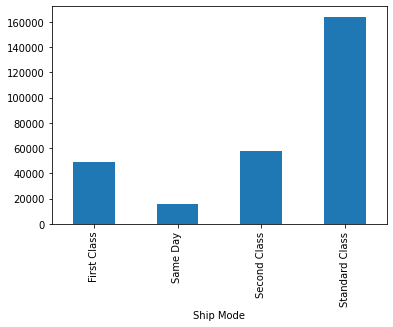

In [26]:
df.groupby(by='Ship Mode')['Profit'].sum().plot.bar()

**Plot Inference**
- Here we are representing Ship-Mode wise Profit graph.
- we can clearly see that Standard Class making more Profit than others.


<AxesSubplot:xlabel='Segment'>

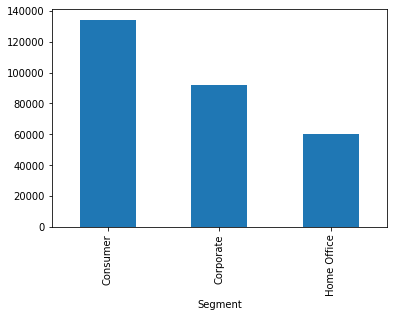

In [27]:
df.groupby(by='Segment')['Profit'].sum().plot.bar()

**Plot Inference**
- Here we are representing Segment wise Profit graph.
- We can clearly see that Consumer making more Profit than others.


In [28]:
#total profit / no. of order
PPO=df['Profit'].sum()/df['Quantity'].count()
round(PPO,2)

28.66

## Conclusion
- Through this we explore various profit aspects, as our traget variable is Profit, through this we can easily manage increase the profit with managing other categories.
